In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\softwares\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\softwares\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Importing Files

### Link to datasets:
https://drive.google.com/drive/folders/1YgHEtqaN0cWbgvoz1CkeNWTpCOMf81Qi?usp=sharing

In [ ]:
train_file_path = "mnist_train.csv"
df_train = pd.read_csv(train_file_path)

In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [ ]:
test_file_path = "mnist_test.csv"
df_test = pd.read_csv(test_file_path)

In [ ]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


# Training and Testing

In [11]:
X_train = df_train.drop(columns=['label'])
y_train = df_train[['label']]

In [12]:
X_test = df_test.drop(columns=['label'])
y_test = df_test[['label']]

In [18]:
# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

## 1. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
print("\nTuning Logistic Regression...")
logistic_params = [
    {"max_iter": 5, "solver": "lbfgs"},
    {"max_iter": 10, "solver": "saga"},
    {"max_iter": 20, "solver": "lbfgs"}
]


Tuning Logistic Regression...


In [23]:
best_logistic_model = None
best_logistic_accuracy = 0
best_logistic_params = None

In [24]:
for params in logistic_params:
    log_reg = LogisticRegression(**params, multi_class='multinomial')
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Testing {params}... Accuracy: {accuracy:.4f}")

    if accuracy > best_logistic_accuracy:
        best_logistic_accuracy = accuracy
        best_logistic_params = params
        best_logistic_model = log_reg
        best_y_pred_logistic = y_pred

Testing {'max_iter': 5, 'solver': 'lbfgs'}... Accuracy: 0.8503
Testing {'max_iter': 10, 'solver': 'saga'}... Accuracy: 0.9264
Testing {'max_iter': 20, 'solver': 'lbfgs'}... Accuracy: 0.9141


Best Logistic Regression Accuracy: 0.9264 with {'max_iter': 10, 'solver': 'saga'}

Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.90      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.94       982
           5       0.90      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



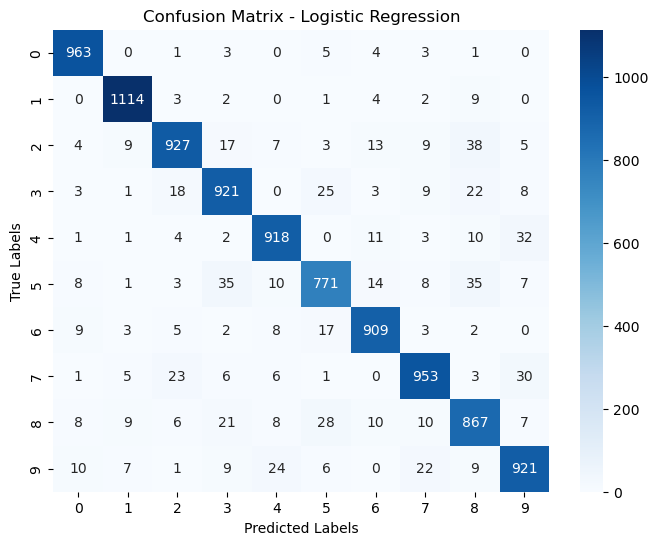

In [25]:
print(f"Best Logistic Regression Accuracy: {best_logistic_accuracy:.4f} with {best_logistic_params}")
print("\nClassification Report - Logistic Regression:\n", classification_report(y_test, best_y_pred_logistic))
plot_confusion_matrix(y_test, best_y_pred_logistic, "Logistic Regression")

## 2. Random Forest 

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
print("\nTuning Random Forest...")
random_forest_params = [
    {"n_estimators": 5, "max_depth": None},
    {"n_estimators": 10, "max_depth": 20},
    {"n_estimators": 20, "max_depth": 30}
]


Tuning Random Forest...


In [28]:
best_rf_model = None
best_rf_accuracy = 0
best_rf_params = None

In [29]:
for params in random_forest_params:
    rf = RandomForestClassifier(**params, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Testing {params}... Accuracy: {accuracy:.4f}")

    if accuracy > best_rf_accuracy:
        best_rf_accuracy = accuracy
        best_rf_params = params
        best_rf_model = rf
        best_y_pred_rf = y_pred

Testing {'n_estimators': 5, 'max_depth': None}... Accuracy: 0.9244
Testing {'n_estimators': 10, 'max_depth': 20}... Accuracy: 0.9478
Testing {'n_estimators': 20, 'max_depth': 30}... Accuracy: 0.9610


Best Random Forest Accuracy: 0.9610 with {'n_estimators': 20, 'max_depth': 30}

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.95      0.95      0.95       892
           6       0.97      0.96      0.97       958
           7       0.96      0.95      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.95      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



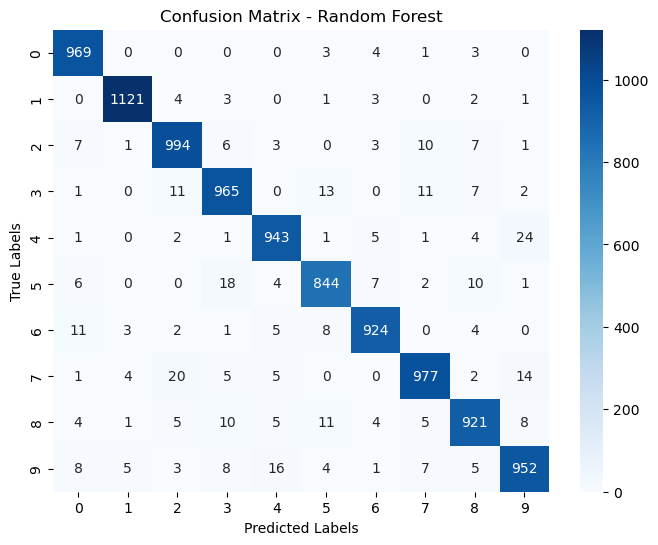

In [30]:
print(f"Best Random Forest Accuracy: {best_rf_accuracy:.4f} with {best_rf_params}")
print("\nClassification Report - Random Forest:\n", classification_report(y_test, best_y_pred_rf))
plot_confusion_matrix(y_test, best_y_pred_rf, "Random Forest")

## 3. K-Nearest Neighbour (KNN)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
print("\nTuning KNN...")
knn_params = [{"n_neighbors": n} for n in [1, 3, 5]]


Tuning KNN...


In [33]:
best_knn_model = None
best_knn_accuracy = 0
best_knn_params = None

In [34]:
for params in knn_params:
    knn = KNeighborsClassifier(**params)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Testing {params}... Accuracy: {accuracy:.4f}")

    if accuracy > best_knn_accuracy:
        best_knn_accuracy = accuracy
        best_knn_params = params
        best_knn_model = knn
        best_y_pred_knn = y_pred

Testing {'n_neighbors': 1}... Accuracy: 0.9691
Testing {'n_neighbors': 3}... Accuracy: 0.9705
Testing {'n_neighbors': 5}... Accuracy: 0.9688


Best KNN Accuracy: 0.9705 with {'n_neighbors': 3}

Classification Report - KNN:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



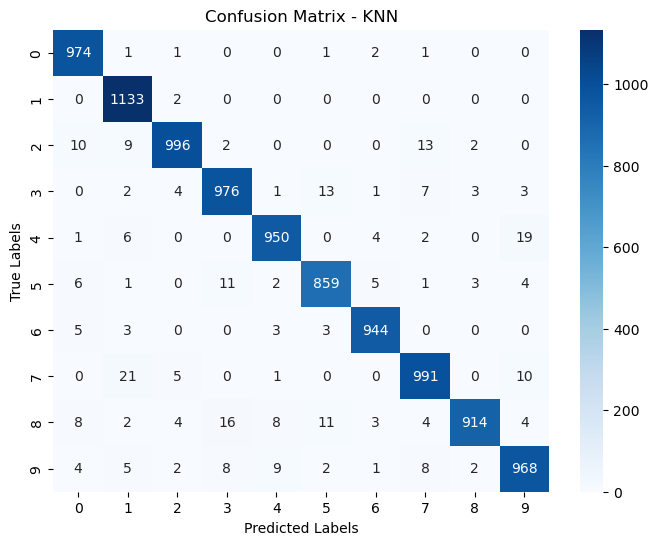

In [35]:
print(f"Best KNN Accuracy: {best_knn_accuracy:.4f} with {best_knn_params}")
print("\nClassification Report - KNN:\n", classification_report(y_test, best_y_pred_knn))
plot_confusion_matrix(y_test, best_y_pred_knn, "KNN")

## 4. Neural Network (MLP) 

In [13]:
from sklearn.neural_network import MLPClassifier

In [14]:
print("\nTuning Neural Network...")
mlp_params = [
    {"hidden_layer_sizes": (64,), "max_iter": 50},
    {"hidden_layer_sizes": (128, 64), "max_iter": 50},
    {"hidden_layer_sizes": (256, 128, 64), "max_iter": 50},
    {"hidden_layer_sizes": (512, 256, 128), "max_iter": 50},
    {"hidden_layer_sizes": (1024, 512, 256), "max_iter": 50}
]


Tuning Neural Network...


In [15]:
best_mlp_model = None
best_mlp_accuracy = 0
best_mlp_params = None

In [16]:
for params in mlp_params:
    mlp = MLPClassifier(**params, activation="relu")
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Testing {params}... Accuracy: {accuracy:.4f}")

    if accuracy > best_mlp_accuracy:
        best_mlp_accuracy = accuracy
        best_mlp_params = params
        best_mlp_model = mlp
        best_y_pred_mlp = y_pred

Testing {'hidden_layer_sizes': (64,), 'max_iter': 50}... Accuracy: 0.9580
Testing {'hidden_layer_sizes': (128, 64), 'max_iter': 50}... Accuracy: 0.9704
Testing {'hidden_layer_sizes': (256, 128, 64), 'max_iter': 50}... Accuracy: 0.9767
Testing {'hidden_layer_sizes': (512, 256, 128), 'max_iter': 50}... Accuracy: 0.9790
Testing {'hidden_layer_sizes': (1024, 512, 256), 'max_iter': 50}... Accuracy: 0.9813


Best Neural Network Accuracy: 0.9813 with {'hidden_layer_sizes': (1024, 512, 256), 'max_iter': 50}

Classification Report - Neural Network:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



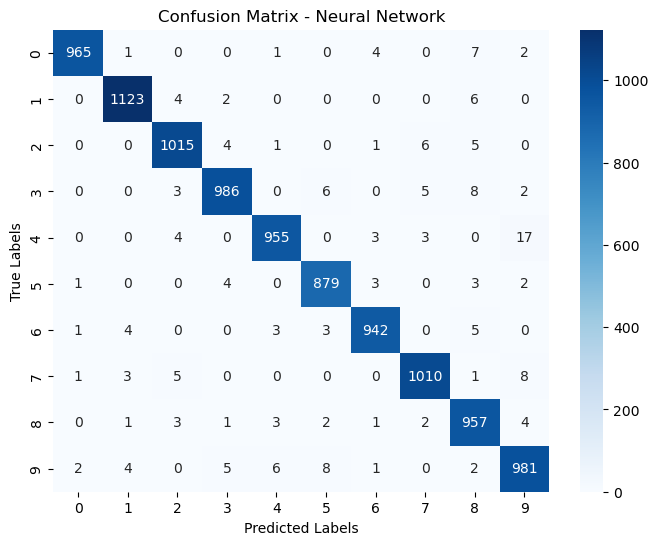

In [19]:
print(f"Best Neural Network Accuracy: {best_mlp_accuracy:.4f} with {best_mlp_params}")
print("\nClassification Report - Neural Network:\n", classification_report(y_test, best_y_pred_mlp))
plot_confusion_matrix(y_test, best_y_pred_mlp, "Neural Network")

In [36]:
import pandas as pd

# Create a comparison table
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors', 'Neural Network'],
    'Accuracy': [best_logistic_accuracy, best_rf_accuracy, best_knn_accuracy, best_mlp_accuracy],
    'Precision': [
        precision_score(y_test, best_y_pred_logistic, average='weighted'),
        precision_score(y_test, best_y_pred_rf, average='weighted'),
        precision_score(y_test, best_y_pred_knn, average='weighted'),
        precision_score(y_test, best_y_pred_mlp, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, best_y_pred_logistic, average='weighted'),
        recall_score(y_test, best_y_pred_rf, average='weighted'),
        recall_score(y_test, best_y_pred_knn, average='weighted'),
        recall_score(y_test, best_y_pred_mlp, average='weighted')
    ],
    'F1-Score': [
        f1_score(y_test, best_y_pred_logistic, average='weighted'),
        f1_score(y_test, best_y_pred_rf, average='weighted'),
        f1_score(y_test, best_y_pred_knn, average='weighted'),
        f1_score(y_test, best_y_pred_mlp, average='weighted')
    ]
})

# Display the comparison table
print("Model Comparison:")
print(comparison)

Model Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.9264   0.926333  0.9264  0.926258
1        Random Forest    0.9610   0.961006  0.9610  0.960971
2  K-Nearest Neighbors    0.9705   0.970688  0.9705  0.970452
3       Neural Network    0.9813   0.981372  0.9813  0.981315


### **Model Performance Ranking**:
   - **Neural Network (MLP)** is the best-performing model with:
     - **Accuracy**: 98.13%
     - **Precision**: 0.9814
     - **Recall**: 0.9813
     - **F1-Score**: 0.9813
   - **K-Nearest Neighbors (KNN)** is the second-best:
     - **Accuracy**: 97.05%
     - **Precision**: 0.9707
     - **Recall**: 0.9705
     - **F1-Score**: 0.9705
   - **Random Forest** performs well but lags behind:
     - **Accuracy**: 96.10%
     - **Precision**: 0.9610
     - **Recall**: 0.9610
     - **F1-Score**: 0.9610
   - **Logistic Regression** is the weakest:
     - **Accuracy**: 92.64%
     - **Precision**: 0.9263
     - **Recall**: 0.9264
     - **F1-Score**: 0.9263

### **Confusion Matrix Insights**:
   - Common misclassifications include:
     - **7** predicted as **1**
     - **4** predicted as **9**
     - **9** predicted as **0**
     - **7** predicted as **4**
   - These misclassifications suggest that the models sometimes confuse digits with similar shapes or strokes.

### Conclusion  

- Based on the model comparison results, the **Neural Network** outperforms all other models with the highest accuracy (**98.13%**) and F1-score (**0.9813**), making it the most effective choice for this classification task.
- The **K-Nearest Neighbors (KNN)** model follows closely with an accuracy of **97.05%**, demonstrating strong performance. - The **Random Forest** model also performs well with **96.10%** accuracy, providing a good balance between interpretability and effectiveness. 
- The **Logistic Regression** model, while having the lowest accuracy (**92.64%**), remains a simpler and computationally efficient option.  

- In summary, if performance is the primary concern, the **Neural Network** should be preferred. However, if interpretability and efficiency are important factors, **Random Forest or KNN** could be viable alternatives depending on the specific requirements of the application.

 # Saving The Best Model

In [37]:
import joblib

In [39]:
import joblib

# Save the best MLP model
joblib.dump(best_mlp_model, "best_mlp_model.pkl")

print("Best MLP model saved successfully as best_mlp_model.pkl")

Best MLP model saved successfully as best_mlp_model.pkl
